# CSCI 575 Final Project: Real/AI-Generated Image Classifier

Imports/Setup

In [30]:
import matplotlib.pyplot as plt
import numpy
import tensorflow
import time

numpy.random.seed(0)
tensorflow.random.set_seed(0)
%matplotlib inline
verbose = 2 # 0==no output, 1==accuracy/loss output, 2==progress bar output

Create helper function to plot results of our model training

In [31]:
def plot_results(history):
    epoch_num = numpy.arange(1, len(history.history['loss'])+1)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epoch_num, history.history['loss'], label='training_loss')
    plt.plot(epoch_num, history.history['val_loss'], label='test_loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epoch_num, history.history['accuracy'], label='training_accuracy')
    plt.plot(epoch_num, history.history['val_accuracy'], label='test_accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)

Load the AI/Real Images data

In [32]:
# Load data
CLASS_NAMES = ['FAKE','REAL']

training_dataset = tensorflow.keras.utils.image_dataset_from_directory(
    directory = 'data/train',
    labels = 'inferred',
    label_mode = 'binary',
    class_names = CLASS_NAMES,
    color_mode = 'rgb',
    batch_size = 32,
    image_size=(64,64),
    shuffle=True,
    seed=99,
)

testing_dataset = tensorflow.keras.utils.image_dataset_from_directory(
    directory = 'data/test',
    labels = 'inferred',
    label_mode = 'binary',
    class_names = CLASS_NAMES,
    color_mode = 'rgb',
    batch_size = 32,
    image_size=(64,64),
    shuffle=True,
    seed=99,
)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


Visualize dataset

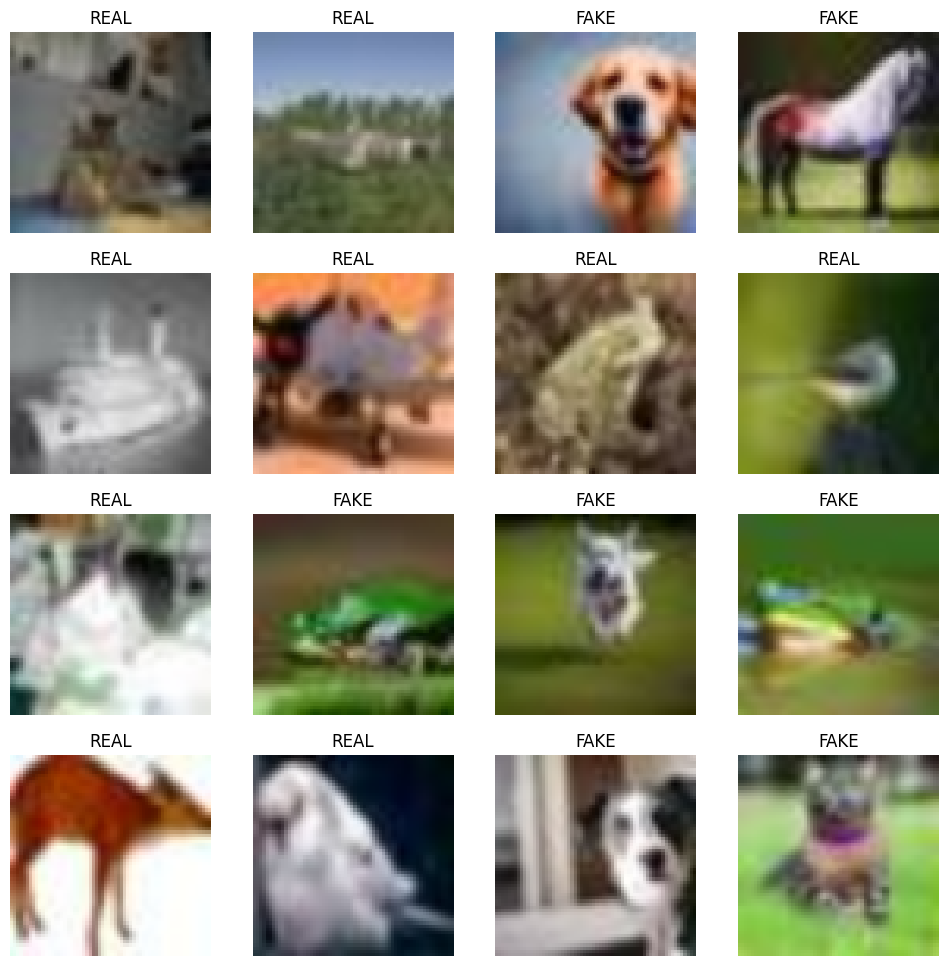

In [33]:
plt.figure(figsize = (12,12))
for image, label in training_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image[i]/255.)
        plt.title(CLASS_NAMES[int(label[i])])
        plt.axis('off')

Baseline Model (from CSCI470 resource-- see references folder)

Epoch 1/50
50/50 - 2s - loss: 1.9791 - accuracy: 0.5219 - val_loss: 1.3058 - val_accuracy: 0.5778 - 2s/epoch - 45ms/step
Epoch 2/50
50/50 - 2s - loss: 0.8469 - accuracy: 0.6894 - val_loss: 1.0200 - val_accuracy: 0.6152 - 2s/epoch - 44ms/step
Epoch 3/50
50/50 - 2s - loss: 0.5613 - accuracy: 0.7656 - val_loss: 0.9624 - val_accuracy: 0.6271 - 2s/epoch - 45ms/step
Epoch 4/50
50/50 - 3s - loss: 0.4085 - accuracy: 0.8231 - val_loss: 0.9874 - val_accuracy: 0.6309 - 3s/epoch - 59ms/step
Epoch 5/50
50/50 - 2s - loss: 0.3056 - accuracy: 0.8800 - val_loss: 1.0176 - val_accuracy: 0.6341 - 2s/epoch - 43ms/step
Epoch 6/50
50/50 - 2s - loss: 0.2445 - accuracy: 0.9006 - val_loss: 1.0905 - val_accuracy: 0.6444 - 2s/epoch - 43ms/step
Epoch 7/50
50/50 - 2s - loss: 0.1932 - accuracy: 0.9300 - val_loss: 1.1352 - val_accuracy: 0.6543 - 2s/epoch - 42ms/step
Epoch 8/50
50/50 - 2s - loss: 0.1371 - accuracy: 0.9563 - val_loss: 1.2090 - val_accuracy: 0.6560 - 2s/epoch - 43ms/step
Epoch 9/50
50/50 - 2s - loss: 0.

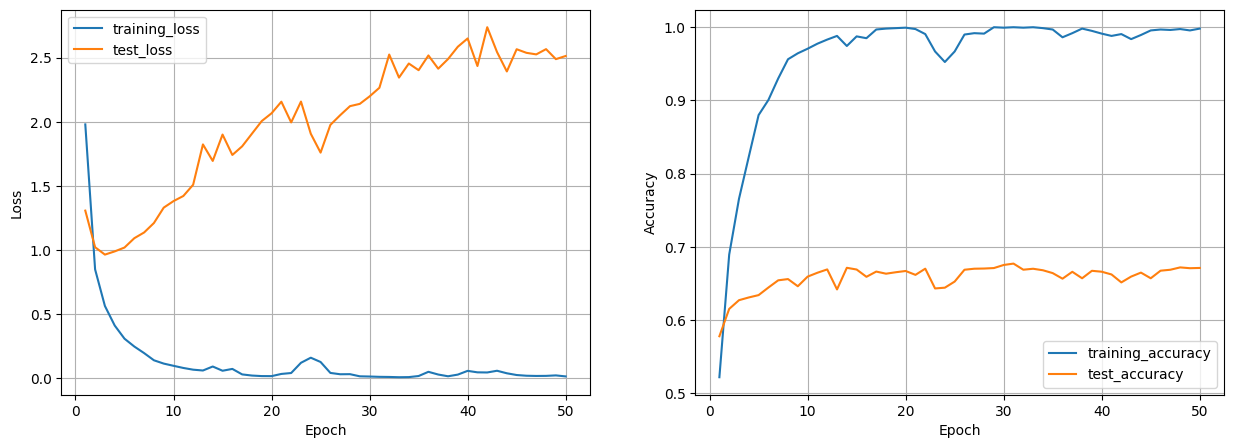

In [34]:
num_kernels = 4
dense_layer_neurons = 64
kernels_size = (3, 3)
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu', input_shape=(64, 64, 3)),
    tensorflow.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tensorflow.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tensorflow.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tensorflow.keras.layers.Flatten(),

    tensorflow.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tensorflow.keras.layers.Dense(10)
])

model.compile(
    loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tensorflow.keras.optimizers.legacy.Adam(0.001),
    metrics=['accuracy'],
)

epochs = 50
t = time.time()
history = model.fit(training_dataset.take(epochs),
                    epochs=epochs,
                    validation_data=testing_dataset,
                    verbose=verbose)
print('Training duration: %f seconds.' % (time.time() - t))

plot_results(history)

Modification 1: Add Batch Normalization layers

Epoch 1/50
50/50 - 3s - loss: 1.1846 - accuracy: 0.5600 - val_loss: 0.7028 - val_accuracy: 0.6367 - 3s/epoch - 54ms/step
Epoch 2/50
50/50 - 2s - loss: 0.5192 - accuracy: 0.7500 - val_loss: 0.5880 - val_accuracy: 0.6926 - 2s/epoch - 49ms/step
Epoch 3/50
50/50 - 3s - loss: 0.3949 - accuracy: 0.8256 - val_loss: 0.6186 - val_accuracy: 0.6872 - 3s/epoch - 51ms/step
Epoch 4/50
50/50 - 3s - loss: 0.3055 - accuracy: 0.8788 - val_loss: 0.5805 - val_accuracy: 0.7240 - 3s/epoch - 53ms/step
Epoch 5/50
50/50 - 3s - loss: 0.2516 - accuracy: 0.9081 - val_loss: 0.6206 - val_accuracy: 0.7189 - 3s/epoch - 57ms/step
Epoch 6/50
50/50 - 3s - loss: 0.1908 - accuracy: 0.9362 - val_loss: 0.6575 - val_accuracy: 0.7211 - 3s/epoch - 57ms/step
Epoch 7/50
50/50 - 3s - loss: 0.1627 - accuracy: 0.9444 - val_loss: 0.7042 - val_accuracy: 0.7200 - 3s/epoch - 52ms/step
Epoch 8/50
50/50 - 2s - loss: 0.1415 - accuracy: 0.9525 - val_loss: 0.6990 - val_accuracy: 0.7231 - 2s/epoch - 50ms/step
Epoch 9/50
50/50 - 3s - loss: 0.

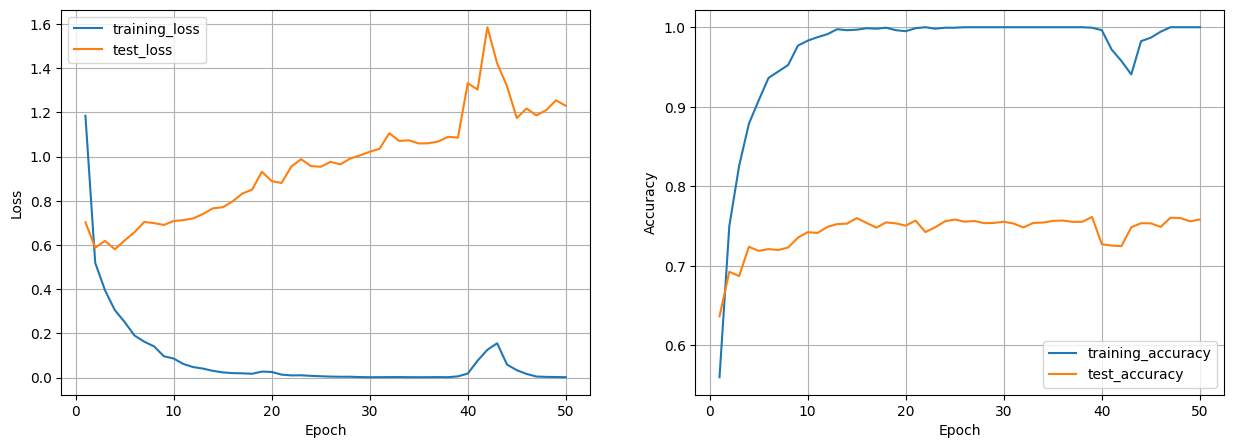

In [35]:
num_kernels = 4
dense_layer_neurons = 64
kernels_size = (3, 3)
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu', input_shape=(64, 64, 3)),
    # New code here
    tensorflow.keras.layers.BatchNormalization(),
    # End new code
    tensorflow.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tensorflow.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    # New code here
    tensorflow.keras.layers.BatchNormalization(),
    # End new code
    tensorflow.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tensorflow.keras.layers.Flatten(),

    tensorflow.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tensorflow.keras.layers.Dense(10)
])

model.compile(
    loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tensorflow.keras.optimizers.legacy.Adam(0.001),
    metrics=['accuracy'],
)

epochs = 50
t = time.time()
history = model.fit(training_dataset.take(epochs),
                    epochs=epochs,
                    validation_data=testing_dataset,
                    verbose=verbose)
print('Training duration: %f seconds.' % (time.time() - t))

plot_results(history)

Modification 2: Adding more convoluational, batch normalization, and max pooling layers

Epoch 1/50
50/50 - 3s - loss: 1.2620 - accuracy: 0.5450 - val_loss: 0.8834 - val_accuracy: 0.6010 - 3s/epoch - 58ms/step
Epoch 2/50
50/50 - 3s - loss: 0.6731 - accuracy: 0.7219 - val_loss: 0.8374 - val_accuracy: 0.6865 - 3s/epoch - 51ms/step
Epoch 3/50
50/50 - 3s - loss: 0.5649 - accuracy: 0.7306 - val_loss: 0.6910 - val_accuracy: 0.6934 - 3s/epoch - 55ms/step
Epoch 4/50
50/50 - 3s - loss: 0.5214 - accuracy: 0.7600 - val_loss: 0.5843 - val_accuracy: 0.7203 - 3s/epoch - 52ms/step
Epoch 5/50
50/50 - 3s - loss: 0.4917 - accuracy: 0.7731 - val_loss: 0.5344 - val_accuracy: 0.7491 - 3s/epoch - 52ms/step
Epoch 6/50
50/50 - 3s - loss: 0.4694 - accuracy: 0.7794 - val_loss: 0.5144 - val_accuracy: 0.7560 - 3s/epoch - 52ms/step
Epoch 7/50
50/50 - 3s - loss: 0.4679 - accuracy: 0.7931 - val_loss: 0.5805 - val_accuracy: 0.7243 - 3s/epoch - 56ms/step
Epoch 8/50
50/50 - 3s - loss: 0.4655 - accuracy: 0.7806 - val_loss: 0.5756 - val_accuracy: 0.7237 - 3s/epoch - 53ms/step
Epoch 9/50
50/50 - 3s - loss: 0.

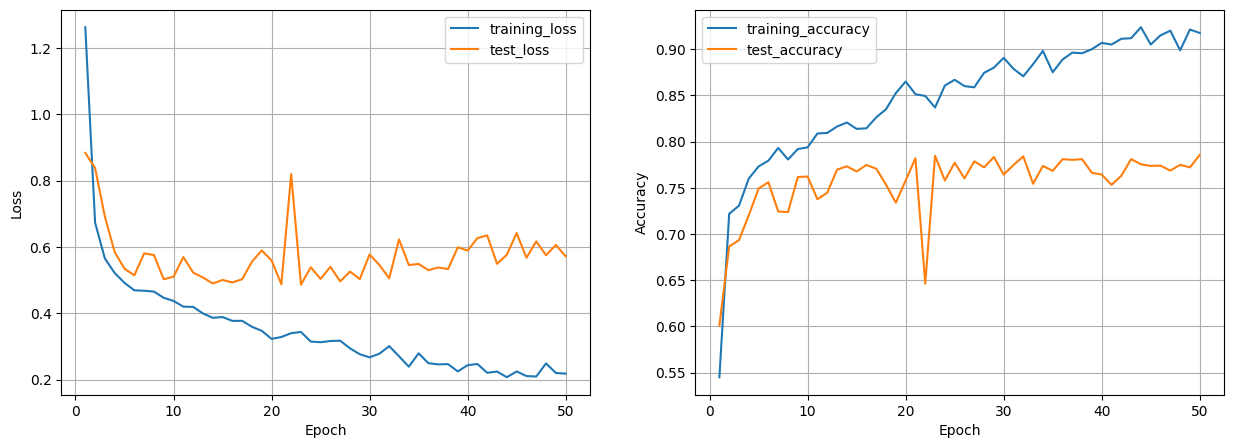

In [36]:
num_kernels = 4
dense_layer_neurons = 64
kernels_size = (3, 3)
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu', input_shape=(64, 64, 3)),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tensorflow.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    
    # New code here
    tensorflow.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tensorflow.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    # End new code

    tensorflow.keras.layers.Flatten(),

    tensorflow.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tensorflow.keras.layers.Dense(10)
])

model.compile(
    loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tensorflow.keras.optimizers.legacy.Adam(0.001),
    metrics=['accuracy'],
)

epochs = 50
t = time.time()
history = model.fit(training_dataset.take(epochs),
                    epochs=epochs,
                    validation_data=testing_dataset,
                    verbose=verbose)
print('Training duration: %f seconds.' % (time.time() - t))

plot_results(history)

Making Predictions with the Final Model

Found 6 files belonging to 2 classes.
1/1 [==============================] - 0s 11ms/step


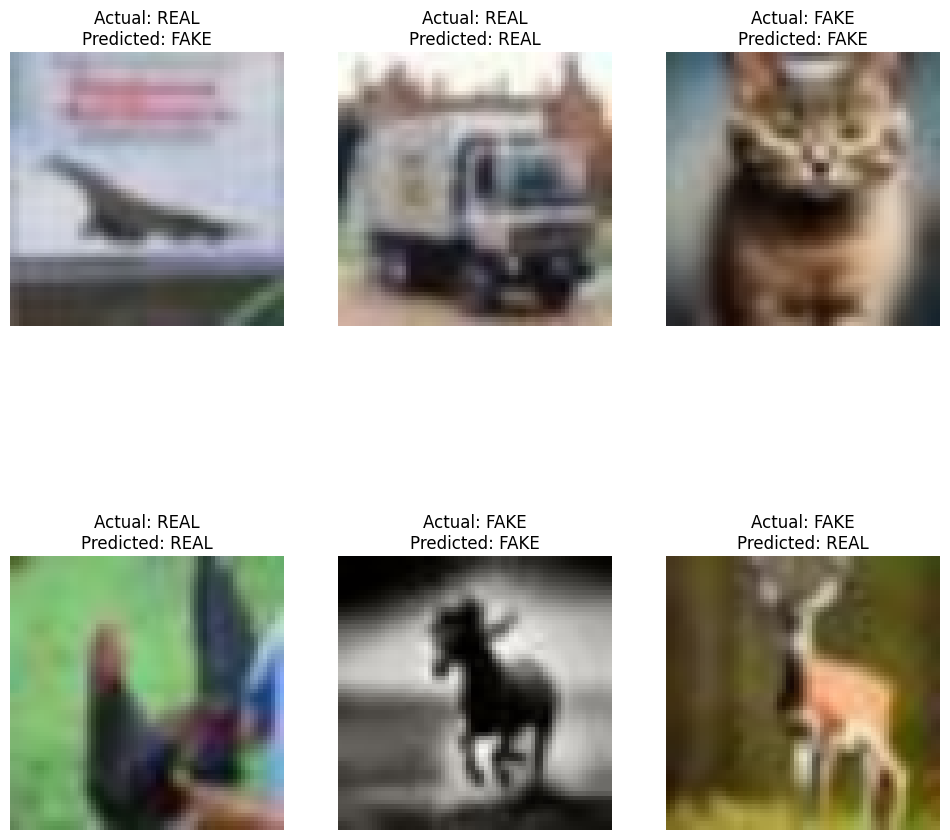

In [48]:
demo_dataset = tensorflow.keras.utils.image_dataset_from_directory(
    directory = 'data/demo',
    labels = 'inferred',
    label_mode = 'binary',
    class_names = CLASS_NAMES,
    color_mode = 'rgb',
    batch_size = 32,
    image_size=(64,64),
    shuffle=True,
    seed=99,
)

def imageToArray(image):
  # Convert the image to a NumPy array and normalize the pixel values (if necessary)
  image_array = numpy.asarray(image)
  image_array = image_array / 255.0  # Normalize the pixel values between 0 and 1

  # Reshape the image array to match the input shape of your model
  image_array = image_array.reshape(64, 64, 3)  # Assumes the input shape is (width, height, 3)

  return image_array

plt.figure(figsize = (12,12))
for image, label in demo_dataset:
    predictions = model.predict(image)
    classes=numpy.argmax(predictions,axis=1)
    for i in range(6):
        ax = plt.subplot(2,3,i+1)
        plt.imshow(image[i]/255.)
        plt.title("Actual: "+CLASS_NAMES[int(label[i])]+"\nPredicted: "+CLASS_NAMES[classes[i]])
        plt.axis('off')